In [ ]:
# LOAD DATA

In [123]:
import tensorflow as tf
import os
# OpenCV is a huge computer vision module
import cv2
# Allows us to check the file extension for our images
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [125]:
# Check all GPU we have available and looping through 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    # Limit the memory growth to what is needed to avoid memory errors
    tf.config.experimental.set_memory_growth(gpu, True)

In [236]:
# Remove dodgy images which may be corrupt or the extension is not correct
data_dir = 'data' 

In [237]:
data_dir

'data'

In [238]:
# Lists all the files within data
os_dir = os.listdir(data_dir)
if ".DS_Store" in os_dir:
    os_dir.remove(".DS_Store")
    
os_dir
# os.listdir(os.path.join(data_dir, 'happy'))

['happy', 'sad']

In [239]:
# List of image extensions
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [240]:
for image_class in os_dir: 
    for image in os.listdir(os.path.join(data_dir, image_class)):
#         print(image)
#         # Check image extensions are what we expect
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # If the image is dodgy we want to remove it
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
#             else:
#                 print(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)


In [295]:
# Load Data - Build a data pipline using the keras generator on the fly.
data = tf.keras.utils.image_dataset_from_directory('data')

Found 272 files belonging to 2 classes.


In [242]:
# Access the data from the generator data pipeline using a numpy iterator
data_iterator = data.as_numpy_iterator()

In [243]:
data_iterator

In [255]:
batch = data_iterator.next()
# Checking how many parts there are to the data. Should be 2 for image and label classes.
# len(batch)

2

In [257]:
# Images represented as numpy arrays
batch[0]

array([[[[211.      , 200.      , 168.      ],
         [211.      , 200.      , 168.      ],
         [211.      , 200.      , 168.      ],
         ...,
         [218.      , 212.      , 190.      ],
         [218.      , 212.      , 190.      ],
         [218.      , 212.      , 190.      ]],

        [[211.      , 200.      , 168.      ],
         [211.      , 200.      , 168.      ],
         [211.      , 200.      , 168.      ],
         ...,
         [218.      , 212.      , 190.      ],
         [218.      , 212.      , 190.      ],
         [218.      , 212.      , 190.      ]],

        [[211.      , 200.      , 168.      ],
         [211.      , 200.      , 168.      ],
         [211.      , 200.      , 168.      ],
         ...,
         [218.      , 212.      , 190.      ],
         [218.      , 212.      , 190.      ],
         [218.      , 212.      , 190.      ]],

        ...,

        [[206.      , 191.      , 162.      ],
         [206.      , 191.      , 162.      ]

In [246]:
# Images labels represented as 1 or 0 for the different classes (happy/sad)
# Note: 1 is sad, 0 is happy
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

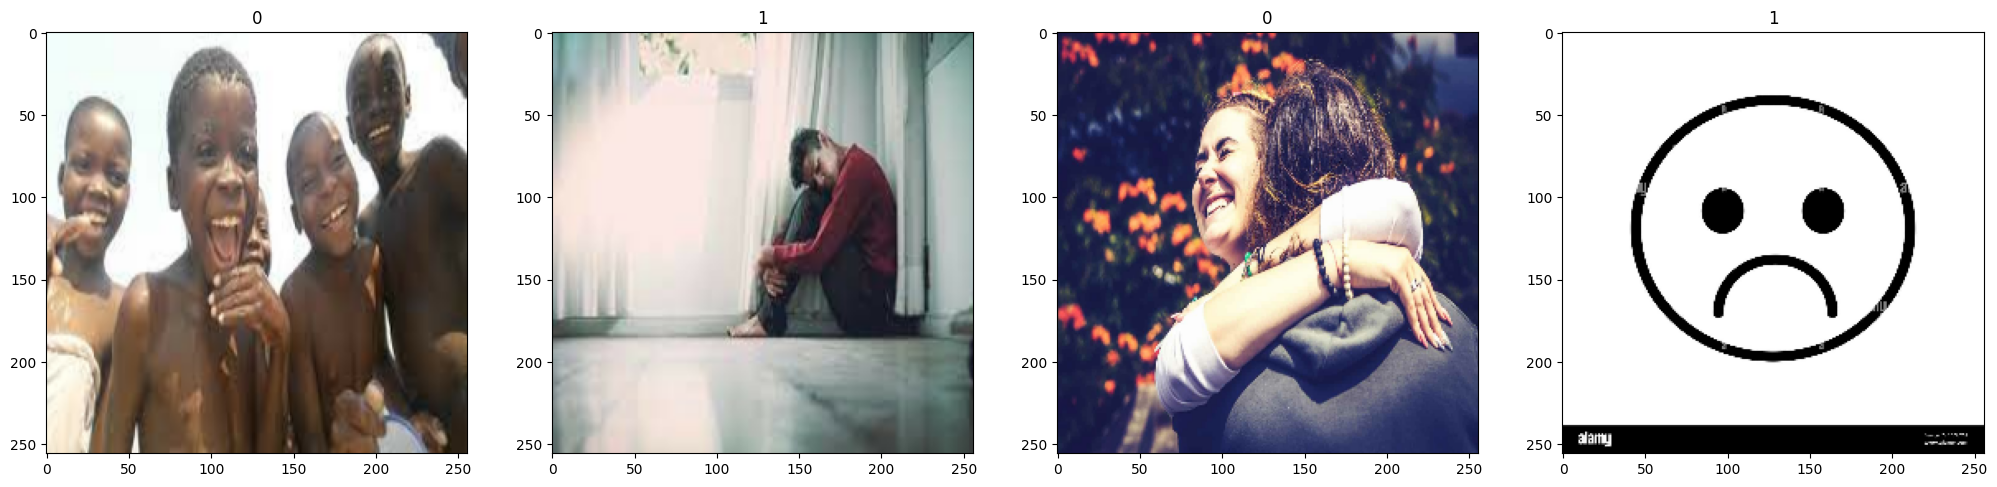

In [247]:
# Visualisation of the classes
fig, ax = plt.subplots(ncols=4, figsize=(25,25))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# PREPROCESSING IMAGE DATA
batch[0].min(), batch[0].max()


In [296]:
# Scale the values between 0 and 1 rather than 255 for processing optimization
# This can be done as we load the data through the data pipeline
data = data.map(lambda x,y: (x/255, y))


In [297]:
batch = data.as_numpy_iterator().next()

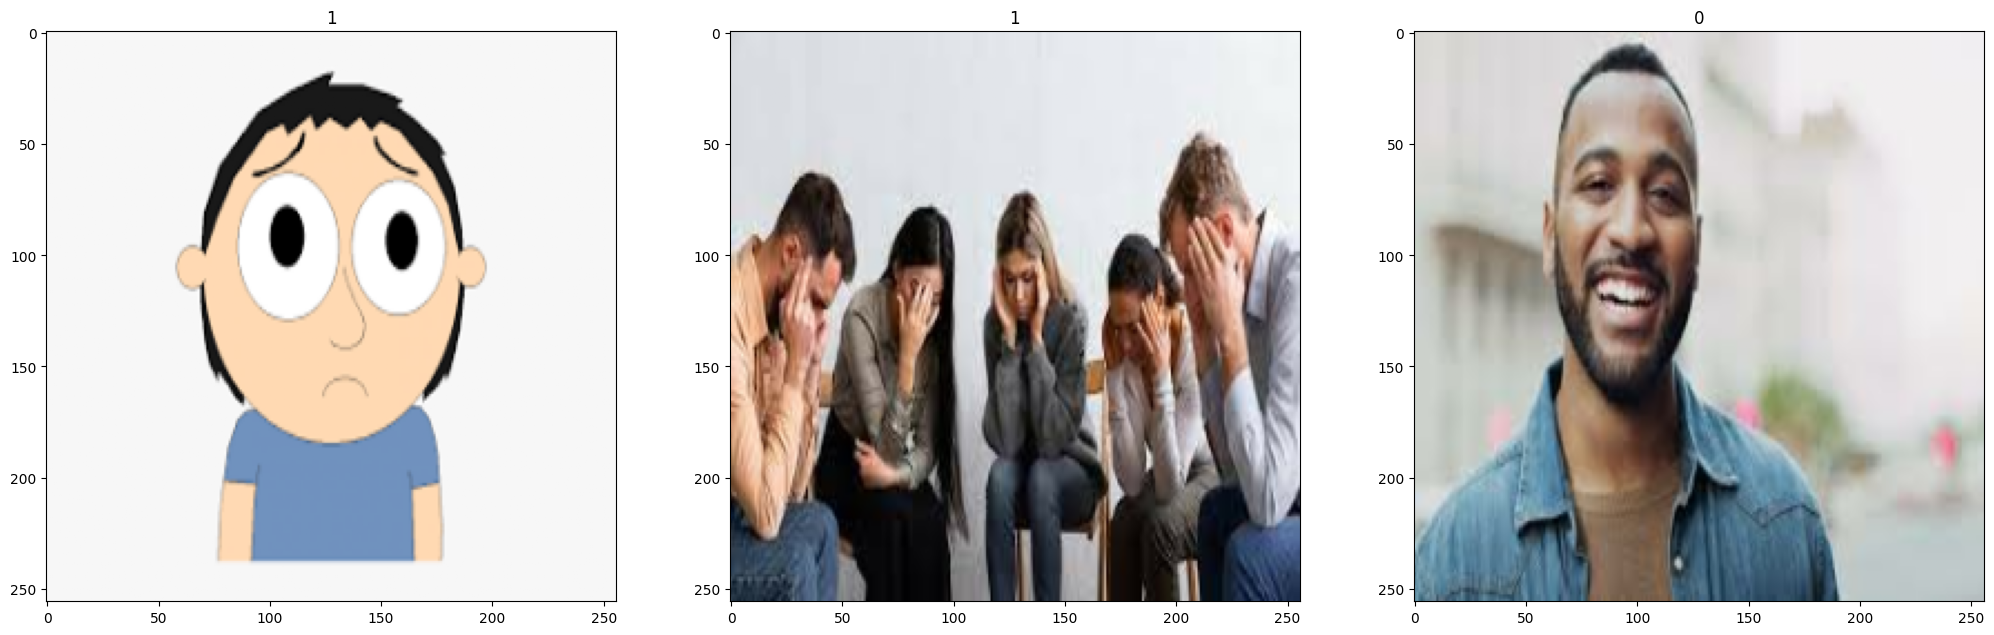

In [317]:
fig, ax = plt.subplots(ncols=3, figsize=(25,25))
for idx, img in enumerate(batch[0][:3]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [276]:
# SPLIT OUR DATA INTO TEST, TRAIN AND VALIDATION TO ENSURE WE DONT OVERFIT

In [299]:
len(data)

9

In [311]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)+1
test_size = int(len(data) * 0.1)+1

In [315]:
# Using test and skip to assign the number of batches of data we want to consider
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
# BUILDING OUR DEEP LEARNING MODEL

In [ ]:
# Model building API dependencies

# Sequencial is good for cases of one data input and one data output
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout